In [17]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from scipy.special import inv_boxcox

In [18]:
import pandas_datareader as pdr
from datetime import datetime

In [19]:
import yfinance as yf

In [21]:
tick = 'AMIORG.NS'
df = yf.download(tick, start = '2022-01-01', end = '2024-05-02')
df.head()

[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2022-01-03,1074.699951,1086.650024,1056.300049,1064.250000,1058.699463,234186
2022-01-04,1075.000000,1079.000000,1032.500000,1036.449951,1031.044434,182753
2022-01-05,1034.000000,1134.699951,1023.450012,1094.250000,1088.542969,729391
2022-01-06,1080.000000,1086.900024,1066.949951,1071.150024,1065.563477,135288
2022-01-07,1078.000000,1083.050049,1038.050049,1047.800049,1042.335327,140989


In [22]:
df_return = round(np.log(df['Close']).diff()*100,2)

In [23]:
df_return.dropna(inplace = True)
df_return.index[-60]

Timestamp('2024-01-31 00:00:00')

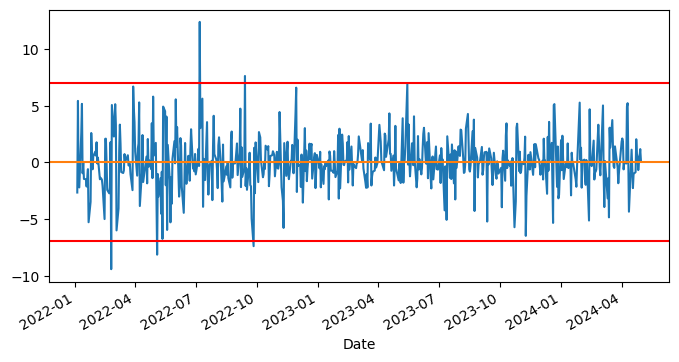

In [24]:
nobs, minmax, mu, var, skew, kurtosis = stats.describe(df_return)
fig, ax = plt.subplots(figsize=(8,4))
lcl = mu - 3*np.sqrt(var)
ucl = mu + 3*np.sqrt(var)
df_return.plot(ax = ax)
ax.axhline(mu, color = 'C1')
ax.axhline(lcl, color = 'r')
ax.axhline(ucl, color = 'r')

<AxesSubplot:xlabel='Close', ylabel='Percent'>

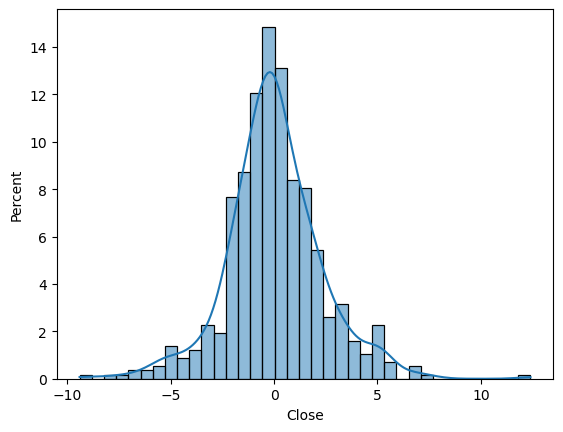

In [25]:
sns.histplot(df_return, kde = True, stat = 'percent')

In [26]:
x = stats.norm.rvs(mu, np.sqrt(var), nobs)

<AxesSubplot:ylabel='Percent'>

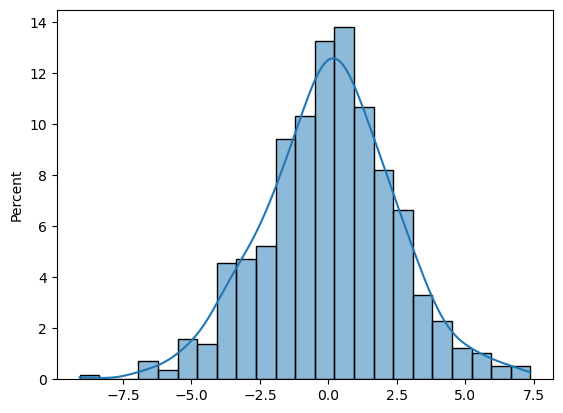

In [27]:
sns.histplot(x, stat = 'percent', kde = True)

In [28]:
#normality test Anderson Darling Test
res = stats.anderson(df_return)
df_Anderson = pd.DataFrame({"critical_values":res.critical_values,"significance_level": res.significance_level})
df_Anderson.head()

,critical_values,significance_level
0,0.572,15.0
1,0.651,10.0
2,0.782,5.0
3,0.912,2.5
4,1.084,1.0


In [29]:
df_Anderson['Normality test'] = ["Normal Distribution" if res.statistic < X else "Non-Normal distribution (rejects H0)" for X in df_Anderson['critical_values']]
#df_Anderson.drop(['Normal/Non-Normal'],axis = 1, inplace = True)
df_Anderson

,critical_values,significance_level,Normality test
0,0.572,15.0,Non-Normal distribution (rejects H0)
1,0.651,10.0,Non-Normal distribution (rejects H0)
2,0.782,5.0,Non-Normal distribution (rejects H0)
3,0.912,2.5,Non-Normal distribution (rejects H0)
4,1.084,1.0,Non-Normal distribution (rejects H0)


In [14]:
res.statistic

1.02713212625315

In [30]:
#normality test D'Agostino and Pearson's Test
k2,p = stats.normaltest(df_return)
print("\nChi Square Statistic =%.3f, p_value = %.3f" %(k2,p))

alpha = 0.05

if p < alpha:
    print("The data is from non-normal distribution (rejects null hypothesis)")
else:
    print("The data is from normal distribution (fails to reject null hypothesis)")


Chi Square Statistic =41.066, p_value = 0.000
The data is from non-normal distribution (rejects null hypothesis)


In [31]:
#box-cox transformation
data_trans, lmbda = stats.yeojohnson(df_return)
print("Optimal value of lmbda " + str(round(lmbda,3)))

Optimal value of lmbda 0.958


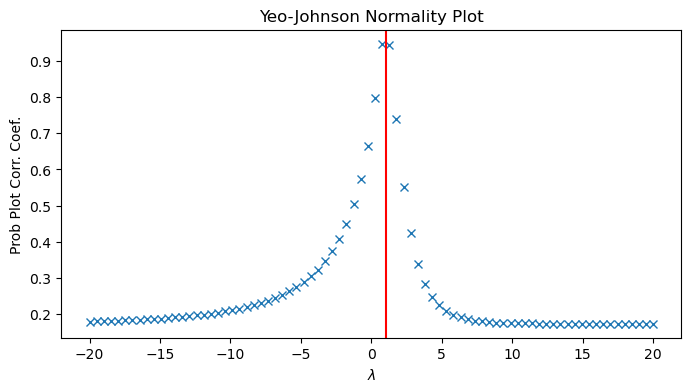

In [148]:
fig, ax = plt.subplots(figsize=(8, 4))
prob = stats.yeojohnson_normplot(amzn_return, -20, 20, plot=ax)
ax.axvline(lmbda, color='r');

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


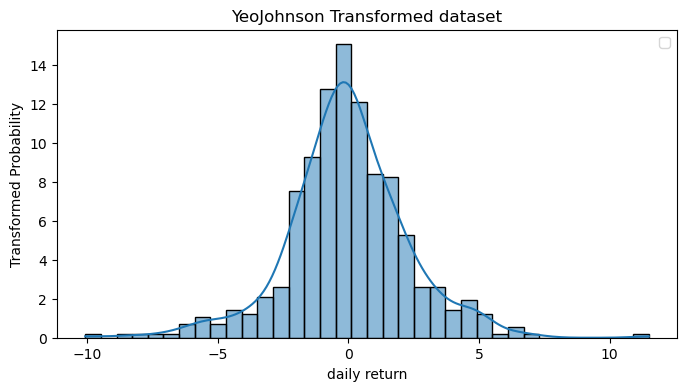

In [32]:
# visual inspection

fig, ax = plt.subplots(figsize=(8, 4))
sns.histplot(data_trans, kde = True, stat = 'percent')
#ax.plot(time_duration_trans, pdf_norm, label='Fitted normal distribution')
ax.set_xlabel('daily return')
ax.set_ylabel('Transformed Probability')
ax.set_title('YeoJohnson Transformed dataset')
ax.legend();

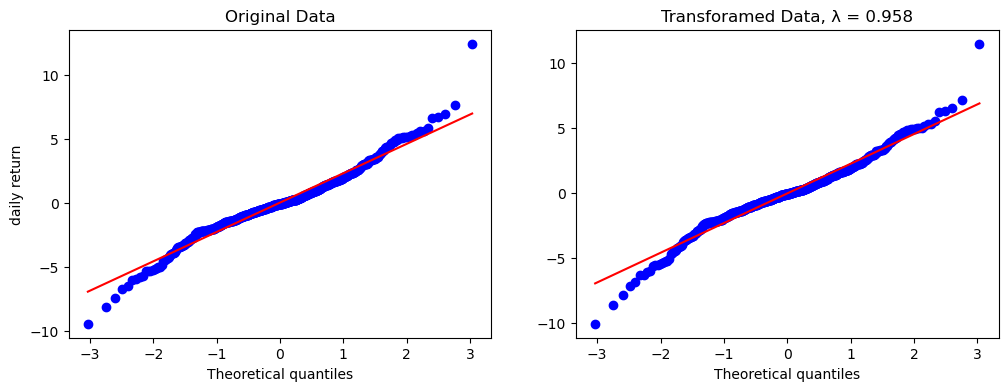

In [34]:
#Q-Q plot
fig, (ax1,ax2) = plt.subplots(1,2,figsize = (12,4))
prob = stats.probplot(df_return,dist = stats.norm, plot = ax1)
prob = stats.probplot(data_trans,dist = stats.norm, plot = ax2)
ax1.set_title('Original Data')
ax1.set_ylabel('daily return')
ax2.set_title('Transforamed Data, λ = %s' % round(lmbda,3));
ax2.set_ylabel('');

In [35]:
#normality test of transformed data
k2,p = stats.normaltest(data_trans)
print("\nChi Square Statistic =%.3f, p_value = %.3f" %(k2,p))

alpha = 0.05

if p < alpha:
    print("The data is from non-normal distribution (rejects null hypothesis)")
else:
    print("The data is from normal distribution (fails to reject null hypothesis)")


Chi Square Statistic =35.599, p_value = 0.000
The data is from non-normal distribution (rejects null hypothesis)
